In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal 
import scipy.fftpack
from pylab import *
from scipy import pi
import pylab
import cmath
import sys
import tensorflow as tf
#import lvm_read
print(tf.__version__)

import os
import pathlib

import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

2.5.0


In [2]:
commands = np.array(['row0001_c', 'row005_c', 'row01_c', 'row1_c', 'row3_c'])

In [3]:
# get want using file path
from os import walk
from os.path import join

def data_path(mypath):
    filepath = []
    ae_path = []
    cu_path = []
    ae_path_container = []
    cu_path_container = []
    # 遞迴列出所有檔案的絕對路徑
    for root, dirs, files in walk(mypath):
        for f in files:
            if f.find("AEdate") >= 0: ae_path.append(f)
            elif f.find("Current") >= 0: cu_path.append(f)
#             elif f.find(".csv") >=0: equ_path = f
        ae_path.sort(key = lambda x: int(x[7:-4]))
        cu_path.sort(key = lambda x: int(x[8:-4]))
        for class_ in ae_path:
            files_path = os.path.join(root, class_)           
            ae_path_container.append(files_path)
        for class_ in cu_path:
            files_path = os.path.join(root, class_)           
            cu_path_container.append(files_path)
#         equ_path_container = equ_path
    return cu_path_container

In [4]:
# read data path
# dryrun_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190313_1113_DryRun/DryRun_c/"
# dryrun_1_data = data_path(dryrun_1_path)
# dryrun_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_fan/DryRun_c/"
# dryrun_2_data = data_path(dryrun_2_path)
# dryrun_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_wheel/DryRun_c/"
# dryrun_3_data = data_path(dryrun_3_path)

row0001_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1602_row0001_feed200um_1_har1/row0001_c/"
row0001_1_data = data_path(row0001_1_path)
row0001_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1630_row0001_feed200um_2_har1/row0001_c/"
row0001_2_data = data_path(row0001_2_path)
row0001_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1720_row0001_feed200um_3_har1/row0001_c/"
row0001_3_data = data_path(row0001_3_path)

# row005_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181203_1404_row005_feed300um_1_nor1/row005_c/"
# row005_1_data = data_path(row005_1_path)
row005_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181204_0900_row005_feed300um_2_nor1/row005_c/"
row005_2_data = data_path(row005_2_path)
row005_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181207_1550_row005_feed100um_3_nor1/row005_c/"
row005_3_data = data_path(row005_3_path)

row01_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01_c/"
row01_1_data = data_path(row01_1_path)
row01_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0310_row01_feed200um_2_sof3/row01_c/"
row01_2_data = data_path(row01_2_path)
row01_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0350_row01_feed150um_3_sof3/row01_c/"
row01_3_data = data_path(row01_3_path)

row1_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1010_row1_feed200um_1_sof2/row1_c/"
row1_1_data = data_path(row1_1_path)
row1_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1102_row1_feed200um_2_sof2/row1_c/"
row1_2_data = data_path(row1_2_path)
row1_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1145_row1_feed200um_3_sof2/row1_c/"
row1_3_data = data_path(row1_3_path)

row3_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1355_row3_feed200um_1_sof1/row3_c/"
row3_1_data = data_path(row3_1_path)
row3_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1430_row3_feed200um_2_sof1/row3_c/"
row3_2_data = data_path(row3_2_path)
row3_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1510_row3_feed200um_3_sof1/row3_c/"
row3_3_data = data_path(row3_3_path)

# print('dryrun_1_data :',shape(dryrun_1_data))
# print('dryrun_2_data :',shape(dryrun_2_data))
# print('dryrun_3_data :',shape(dryrun_3_data))

print('row0001_1_data :',shape(row0001_1_data))
print('row0001_2_data :',shape(row0001_2_data))
print('row0001_3_data :',shape(row0001_3_data))

# print('row005_1_data :',shape(row005_1_data))
print('row005_2_data :',shape(row005_2_data))
print('row005_3_data :',shape(row005_3_data))

print('row01_1_data :',shape(row01_1_data))
print('row01_2_data :',shape(row01_2_data))
print('row01_3_data :',shape(row01_3_data))

print('row1_1_data :',shape(row1_1_data))
print('row1_2_data :',shape(row1_2_data))
print('row1_3_data :',shape(row1_3_data))

print('row3_1_data :',shape(row3_1_data))
print('row3_2_data :',shape(row3_2_data))
print('row3_3_data :',shape(row3_3_data))

row0001_1_data : (180,)
row0001_2_data : (174,)
row0001_3_data : (168,)
row005_2_data : (201,)
row005_3_data : (101,)
row01_1_data : (200,)
row01_2_data : (200,)
row01_3_data : (152,)
row1_1_data : (200,)
row1_2_data : (201,)
row1_3_data : (200,)
row3_1_data : (202,)
row3_2_data : (200,)
row3_3_data : (201,)


In [5]:
# dryrun_all = np.hstack((dryrun_1_data))
row0001_all = np.hstack((row0001_1_data, row0001_2_data, row0001_3_data))
row005_all = np.hstack(( row005_2_data, row005_3_data))
row01_all = np.hstack((row01_1_data, row01_2_data, row01_3_data))
row1_all = np.hstack((row1_1_data, row1_2_data, row1_3_data))
row3_all = np.hstack((row3_1_data, row3_2_data, row3_3_data))
# print('dryrun shape:  ',dryrun_all.shape)
print('row0001 shape: ',row0001_all.shape)
print('row005 shape:  ',row005_all.shape)
print('row01 shape:   ',row01_all.shape)
print('row1 shape:    ',row1_all.shape)
print('row3 shape:    ',row3_all.shape)
all_filepath = np.hstack((row0001_all, row005_all, row01_all, row1_all, row3_all))
print('all_filepath shape: {}'.format(all_filepath.shape))

row0001 shape:  (522,)
row005 shape:   (302,)
row01 shape:    (552,)
row1 shape:     (601,)
row3 shape:     (603,)
all_filepath shape: (2580,)


In [6]:
# def get_label(file):
#     class_name = []
#     for f in file:
#         if f.find("DryRun") >=0: class_name.append(0)
#         elif f.find("row0001") >=0: class_name.append(1)
#         elif f.find("row005") >=0: class_name.append(2)
#         elif f.find("row01") >=0: class_name.append(3)
#         elif f.find("row1") >=0: class_name.append(4)
#         elif f.find("row3") >=0: class_name.append(5)
#     return class_name

# all_filelabel = get_label(all_filepath)

In [7]:
filenames = tf.random.shuffle(all_filepath, seed=42)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Example file[0] tensor: {}'.format(filenames[0]))

Number of total examples: 2580
Example file[0] tensor: b'/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01_c/Current_240.lvm'


In [8]:
train_files = filenames[:2064]
val_files = filenames[2064: 2064 + 258]
test_files = filenames[-258:]

print('Training set size   :', len(train_files))
print('Validation set size :', len(val_files))
print('Test set size       :', len(test_files))

Training set size   : 2064
Validation set size : 258
Test set size       : 258


### Reading Vibration files and their labels

In [9]:
def decode_ae(ae_binary):
    raw_data = tf.strings.split(ae_binary)[74:]
    raw_data = tf.reshape(raw_data, [-1, 5])
    raw_data = raw_data[:, -2]
    raw_data = tf.strings.to_number(raw_data, out_type=tf.dtypes.float32, name=None )
    raw_data = raw_data - tf.math.reduce_mean(raw_data)
    return raw_data

In [10]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)

  # Note: You'll use indexing here instead of tuple unpacking to enable this 
  # to work in a TensorFlow graph.
    return parts[-2]

In [11]:
def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_ae(audio_binary)
    return waveform, label

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

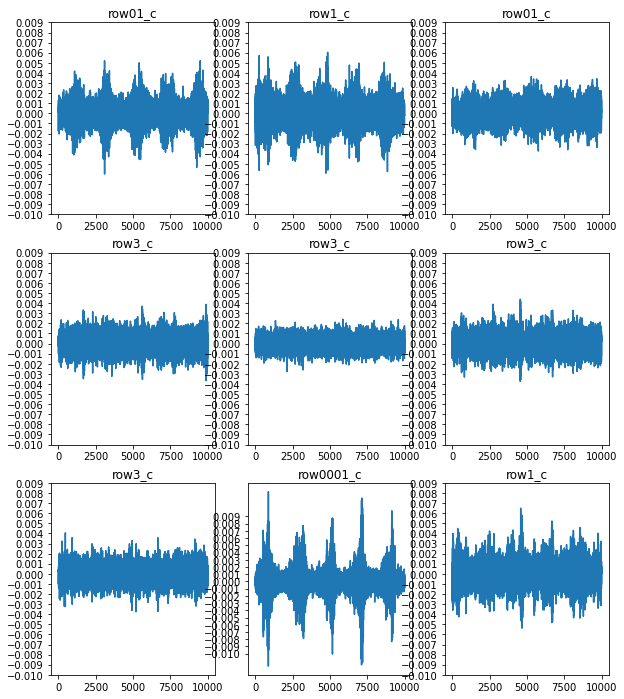

In [13]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-0.01, 0.01, 0.001))
    label = label.numpy().decode('utf-8')
    ax.set_title(label)

plt.show()

### Spectrogram

In [14]:
def get_spectrogram(waveform):

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
#     waveform = tf.expand_dims(waveform, -1)
    
    
#     spectrogram = tf.signal.stft(
#         waveform, frame_length=512,frame_step=256, fft_length=512,
#         window_fn=tf.signal.hann_window, pad_end=False, name=None)

    waveform = tf.abs(waveform)
#     spectrogram = spectrogram[:, :]

    return waveform

In [15]:
for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode('utf-8')
    spectrogram = get_spectrogram(waveform)
print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)

Label: row01_c
Waveform shape: (10000,)
Spectrogram shape: (10000,)


/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


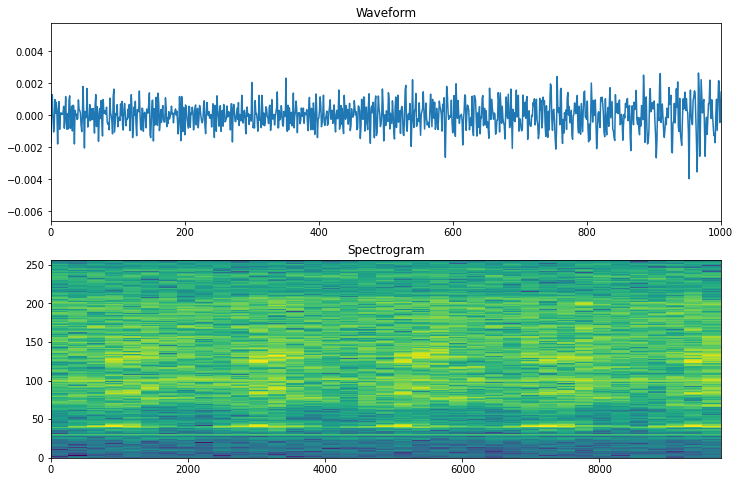

In [16]:
# def plot_spectrogram(spectrogram, ax):
#   # Convert to frequencies to log scale and transpose so that the time is
#   # represented in the x-axis (columns).
#     log_spec = np.log(spectrogram.T)
#     height = log_spec.shape[0]
#     width = log_spec.shape[1]
#     X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
#     Y = range(height)
#     ax.pcolormesh(X, Y, log_spec)


# fig, axes = plt.subplots(2, figsize=(12, 8))
# timescale = np.arange(waveform.shape[0])
# axes[0].plot(timescale, waveform.numpy())
# axes[0].set_title('Waveform')
# axes[0].set_xlim([0, 1000])
# plot_spectrogram(spectrogram.numpy(), axes[1])
# axes[1].set_title('Spectrogram')
# plt.show()

In [16]:
def get_spectrogram_and_label_id(audio, label):
    spectrogram = get_spectrogram(audio)
    spectrogram = tf.expand_dims(spectrogram, -1)
    label_id = tf.argmax(label == commands)
    return spectrogram, label_id

In [17]:
spectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


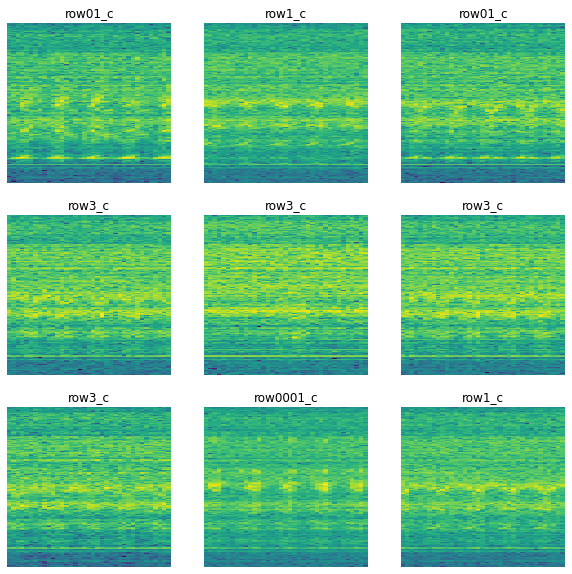

In [19]:
# rows = 3
# cols = 3
# n = rows*cols
# fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
# for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
#     r = i // cols
#     c = i % cols
#     ax = axes[r][c]
#     plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
#     ax.set_title(commands[label_id.numpy()])
#     ax.axis('off')

# plt.show()

### Build and train the model

In [18]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)
    output_ds = output_ds.map(
        get_spectrogram_and_label_id,  num_parallel_calls=AUTOTUNE)
    return output_ds

In [19]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [20]:
batch_size = 8
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [21]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [22]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)
norm_layer = preprocessing.Normalization()
norm_layer.adapt(spectrogram_ds.map(lambda x, _: x))

Input shape: (10000, 1)


In [52]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    norm_layer,
    
    layers.Conv1D(filters=32,
                    kernel_size=(8,),
                    strides=1,
                    activation='relu',
                    input_shape=input_shape[1:],),
#     layers.Dropout(0.3),
    layers.Conv1D(filters=32,
                    kernel_size=(4,),
                    strides=1,
                    activation='relu'),
#     layers.Dropout(0.3),
    layers.Conv1D(filters=32,
                    kernel_size=(2,),
                    strides=1,
                    activation='relu'),
    layers.Conv1D(filters=32,
                    kernel_size=(8,),
                    strides=1,
                    activation='relu',
                    input_shape=input_shape[1:],),
    layers.Conv1D(filters=32,
                    kernel_size=(4,),
                    strides=1,
                    activation='relu'),
    layers.Conv1D(filters=32,
                    kernel_size=(2,),
                    strides=1,
                    activation='relu'),
    
    layers.Dropout(0.3),
#     layers.AveragePooling1D(pool_size=2, strides=None, padding='valid'),
    layers.MaxPooling1D(pool_size=2, strides=None, padding='valid'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 10000, 1)          3         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 9993, 32)          288       
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 9990, 32)          4128      
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 9989, 32)          2080      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 9982, 32)          8224      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 9979, 32)          4128      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 9978, 32)         

In [53]:
from tensorflow.keras import callbacks
log_dirs = 'lab1-log-scalers'
model_cbk = callbacks.TensorBoard(log_dirs)

In [54]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [55]:
EPOCHS = 10
history = model.fit(
    train_ds, 
    validation_data=val_ds,  
    epochs=EPOCHS,
#     callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
    callbacks=[tf.keras.callbacks.EarlyStopping(verbose=1, patience=2), model_cbk],
)

Epoch 1/10
258/258 [==============================] - 50s 192ms/step - loss: 1.1168 - accuracy: 0.5635 - val_loss: 0.8152 - val_accuracy: 0.7558
Epoch 2/10
258/258 [==============================] - 49s 189ms/step - loss: 0.8263 - accuracy: 0.6817 - val_loss: 0.5959 - val_accuracy: 0.7791
Epoch 3/10
258/258 [==============================] - 49s 190ms/step - loss: 0.7678 - accuracy: 0.7219 - val_loss: 0.6205 - val_accuracy: 0.7519
Epoch 4/10
258/258 [==============================] - 49s 191ms/step - loss: 0.6948 - accuracy: 0.7558 - val_loss: 0.5603 - val_accuracy: 0.7752
Epoch 5/10
258/258 [==============================] - 49s 191ms/step - loss: 0.6485 - accuracy: 0.7703 - val_loss: 0.5620 - val_accuracy: 0.7829
Epoch 6/10
258/258 [==============================] - 49s 191ms/step - loss: 0.5631 - accuracy: 0.7902 - val_loss: 0.4814 - val_accuracy: 0.8062
Epoch 7/10
258/258 [==============================] - 49s 191ms/step - loss: 0.5634 - accuracy: 0.8043 - val_loss: 0.4378 - val_ac

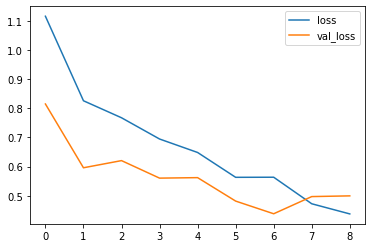

In [56]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

### Evaluate test set performance

In [30]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [31]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 98%


### Display a confusion matrix

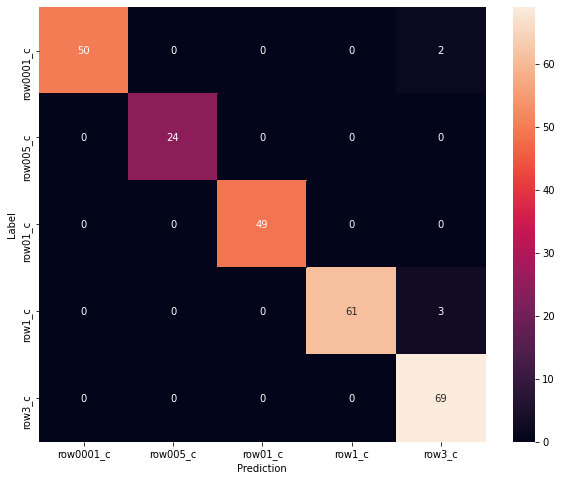

In [32]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

### Run inference on an audio file

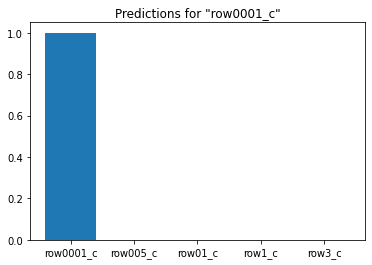

In [33]:
sample_file = preprocess_dataset(['/media/a00439/2C167E66167E30C6/AEdata/20190104_1602_row0001_feed200um_1_har1/row0001_c/Current_700.lvm'])

sample_ds = sample_file

for spectrogram, label in sample_ds.batch(1):
    prediction = model(spectrogram)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f'Predictions for "{commands[label[0]]}"')
    plt.show()